In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pwd
%cd yolov5

!ls

[Errno 2] No such file or directory: 'yolov5'
/Users/sathya/Desktop/Learning/yolov5
CITATION.cff          classify              pyproject.toml
CONTRIBUTING.md       data                  requirements.txt
LICENSE               dataloader_test.ipynb segment
Mask_generation.ipynb detect.py             train.py
README.md             export.py             tutorial.ipynb
README.zh-CN.md       hubconf.py            utils
benchmarks.py         models                val.py


/Users/sathya/opt/anaconda3/envs/YOLOV5/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-391-g2fa03a40 Python-3.11.10 torch-2.2.2 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 480.4/926.4 GB disk)


In [19]:
from utils.dataloaders import LoadImagesAndLabels

dataset = LoadImagesAndLabels('/Users/sathya/Desktop/Learning/datasets/coco')



Scanning /Users/sathya/Desktop/Learning/datasets/coco/labels/val2017.cache... 49


In [5]:
dataset.cache_version

0.7

In [13]:
dataset.im_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/images/val2017/000000000139.jpg'

In [14]:
dataset.label_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/labels/val2017/000000000139.txt'

In [20]:
dataset.mask_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/images/mask/000000000139_mask.png'

In [24]:
dataset[0][0].shape

torch.Size([3, 640, 640])

In [35]:
dataset[0][1].shape

torch.Size([640, 640])

Labels:
tensor([[0.00000e+00, 6.20000e+01, 8.26632e-01, 1.29883e-01, 9.67342e-02, 1.29797e-01],
        [0.00000e+00, 4.10000e+01, 4.04250e-01, 4.26969e-01, 1.20156e-01, 2.27094e-01],
        [0.00000e+00, 4.10000e+01, 7.65750e-01, 4.58484e-01, 1.42937e-01, 2.62719e-01],
        [0.00000e+00, 4.20000e+01, 7.47711e-01, 4.68305e-01, 2.54579e-01, 3.83910e-02],
        [0.00000e+00, 4.30000e+01, 8.06914e-01, 7.00656e-01, 1.36172e-01, 1.40844e-01],
        [0.00000e+00, 5.30000e+01, 4.76508e-01, 7.93585e-01, 7.03016e-01, 4.12826e-01],
        [0.00000e+00, 4.10000e+01, 5.80883e-01, 2.44695e-01, 6.07342e-02, 1.17547e-01],
        [0.00000e+00, 4.10000e+01, 7.56226e-01, 2.21813e-01, 6.95783e-02, 9.10940e-02],
        [0.00000e+00, 4.20000e+01, 2.39609e-01, 5.13484e-01, 2.20219e-01, 2.92190e-02],
        [0.00000e+00, 5.30000e+01, 7.39149e-01, 3.32062e-01, 2.71703e-01, 6.80000e-02],
        [0.00000e+00, 5.30000e+01, 3.89867e-01, 3.13695e-01, 2.56859e-01, 8.62660e-02],
        [0.00000e+00, 6.

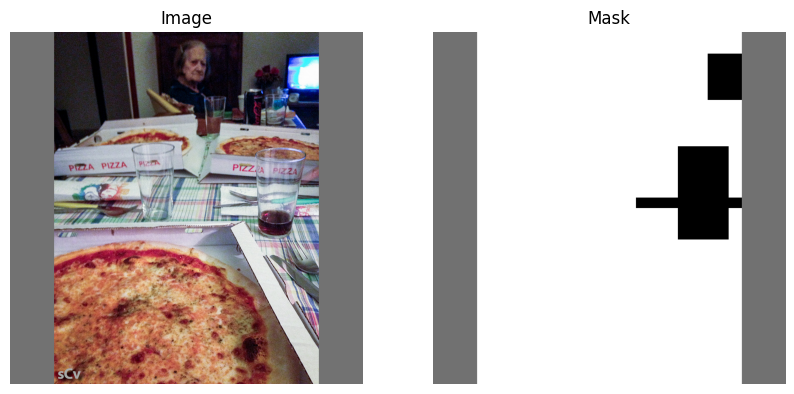

In [33]:
import torch
import matplotlib.pyplot as plt

# Assuming the function returns the following
img_tensor, mask_tensor, labels_out, file_name, shapes = dataset[120]

# Convert tensors to numpy arrays for visualization
img = img_tensor.numpy()
mask = mask_tensor.numpy()

# Convert the image tensor from (C, H, W) to (H, W, C) if it's RGB
if img.ndim == 3:  # RGB image
    img = img.transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)

# No transpose required for mask if it is grayscale
# Just ensure the mask remains a 2D array if it is grayscale
if mask.ndim == 3 and mask.shape[0] == 1:  # Single channel, remove channel dimension
    mask = mask.squeeze(0)  # Convert from (1, H, W) to (H, W)

# Print labels
print("Labels:")
print(labels_out)

# Display the image and mask
plt.figure(figsize=(10, 5))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)  # Use grayscale cmap if 2D
plt.title("Image")
plt.axis('off')

# Show the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')  # Always display the mask as grayscale
plt.title("Mask")
plt.axis('off')

plt.show()


In [59]:
len(dataset[10])

5

In [63]:
dataset[101][0]

tensor([[[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]],

        [[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]],

        [[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]]], dtype=torch.uint8)

In [60]:
dataset[1][4]

((640, 586), ((1.0, 1.0), (27.0, 0.0)))

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
im = 'yolov5/data/images/bus.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print() 

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images